## 시계열 예측

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from fbprophet import Prophet
%matplotlib inline

In [20]:
train = pd.read_csv("../data/Dataset/arima.csv")

In [21]:
train['yearmonthday'] = pd.date_range("2014-01-01", "2018-12-31") 
#train = train.set_index('yearmonthday')

In [22]:
train.head()

,yearmonthday,H001,H002,H003,H004,H005,H006,H007,H008,H009,...,H091,H092,H093,H094,H095,H096,H097,H098,H099,H100
0,2014-01-01,8002.013439,9374.100242,8926.053670,7854.655797,10005.742224,7942.912449,9348.503016,8895.331264,7941.691442,...,10016.422702,9383.705178,8017.581149,5654.512243,8907.919057,9432.821532,9077.037054,8170.101441,8901.225291,7987.873131
1,2014-01-02,8063.541915,9184.531919,8981.163512,8097.817958,10031.535489,7929.927836,9333.370549,9029.392781,8040.151095,...,9771.175038,9360.799380,8078.070607,5727.062238,9042.727025,9276.398347,8757.147435,8057.946223,9030.299677,8101.551600
2,2014-01-03,8094.440975,9358.184255,8851.485988,7933.190311,9863.738407,8128.164508,9165.513026,9120.360769,8030.459084,...,9893.241573,9402.203555,8137.534641,5754.682981,9095.997254,9186.903447,8944.030066,7894.960281,8851.481561,8179.071301
3,2014-01-04,8087.550033,9382.207702,8726.725003,7946.001117,9873.521518,8024.933213,9248.250595,9019.200833,8079.931214,...,9833.367533,9564.121945,7981.252467,5774.126384,8830.781012,9385.410567,8920.280357,7891.157736,8994.548526,7974.259650
4,2014-01-05,7972.134184,9397.416868,8813.540397,8018.801156,9747.454594,8040.876211,9476.472954,8885.154955,7932.953009,...,9956.086192,9332.450949,8078.392967,5683.408710,8832.144918,9209.674945,9026.644441,8113.428524,9000.152368,8089.844638


In [23]:
new_train = train[['yearmonthday', 'H001']]

In [24]:
new_train.head()

,yearmonthday,H001
0,2014-01-01,8002.013439
1,2014-01-02,8063.541915
2,2014-01-03,8094.440975
3,2014-01-04,8087.550033
4,2014-01-05,7972.134184


In [25]:
new_train.columns = ['ds','y']

In [26]:
model = Prophet()

In [27]:
model.fit(new_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
future = model.make_future_dataframe(periods=365) 

In [29]:
forecast = model.predict(future)

In [30]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2186,2019-12-27,7224.302868,7204.172305,7516.373023,7213.803597,7233.757555,134.446427,134.446427,134.446427,-2.194166,-2.194166,-2.194166,136.640593,136.640593,136.640593,0.0,0.0,0.0,7358.749295
2187,2019-12-28,7224.286835,7261.990772,7565.675718,7213.745520,7233.773696,185.182093,185.182093,185.182093,8.057247,8.057247,8.057247,177.124846,177.124846,177.124846,0.0,0.0,0.0,7409.468927
2188,2019-12-29,7224.270801,7296.281114,7595.204879,7213.688996,7233.789836,215.277655,215.277655,215.277655,-5.456347,-5.456347,-5.456347,220.734001,220.734001,220.734001,0.0,0.0,0.0,7439.548456
2189,2019-12-30,7224.254768,7339.342658,7648.664669,7213.640318,7233.805977,273.078350,273.078350,273.078350,6.089226,6.089226,6.089226,266.989124,266.989124,266.989124,0.0,0.0,0.0,7497.333118
2190,2019-12-31,7224.238735,7385.494433,7696.694133,7213.640329,7233.822118,313.012964,313.012964,313.012964,-2.328789,-2.328789,-2.328789,315.341754,315.341754,315.341754,0.0,0.0,0.0,7537.251699


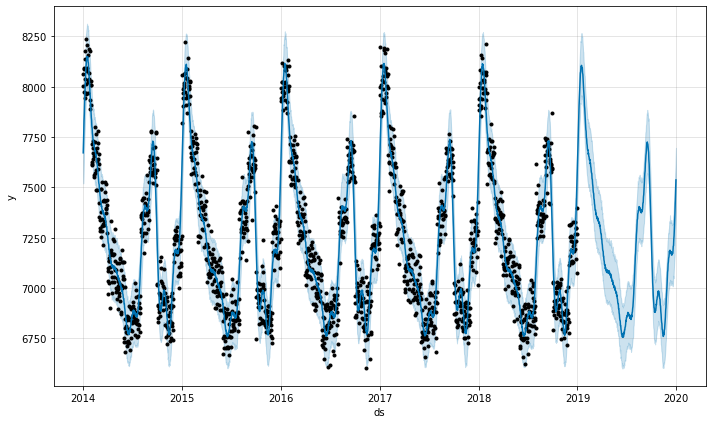

In [31]:
fig1 = model.plot(forecast)

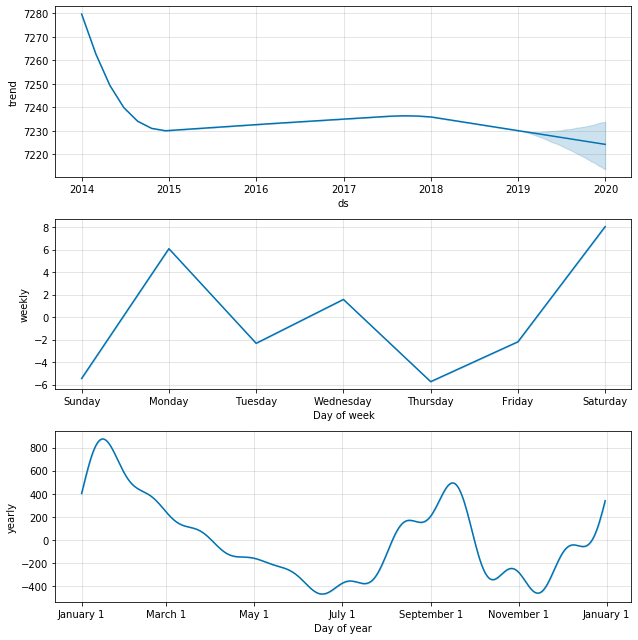

In [32]:
fig2 = model.plot_components(forecast)